<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/assess_reliability_of_bank_borrowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Задачей проекта является поиск ответов на следующие вопросы:**
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
5. Как разные цели кредита влияют на его возврат в срок?

**План работы:**
1. Шаг 1. Открыть файл с данными и изучить общую информацию
2. Шаг 2. Осуществить предобработку данных (обработать пропуски, заменить типы данных, обработать дубликаты, произвести лемматизацию, осуществить категоризацию данных)
3. Шаг 3. Ответить на вопросы, поставленные в задачах
4. Шаг 4. Сформулировать общий вывод

**Описание данных:**

* children — *количество детей в семье*
* days_employed — *общий трудовой стаж в днях*
* dob_years — *возраст клиента в годах*
* education — *уровень образования клиента*
* education_id — *идентификатор уровня образования*
* family_status — *семейное положение*
* family_status_id — *идентификатор семейного положения*
* gender — *пол клиента*
* income_type — *тип занятости*
* debt — *имел ли задолженность по возврату кредитов*
* total_income — *ежемесячный доход*
* purpose — *цель получения кредита*

## Знакомство с данными <a id="start"></a>

### Общие сведения

In [ ]:
import pandas as pd
from pymystem3 import Mystem
m = Mystem() 
from collections import Counter
import matplotlib.pyplot as plt
import warnings

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/data.csv')

In [ ]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639,покупка жилья
1,1,-4024.804,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014,приобретение автомобиля
2,0,-5623.423,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952,покупка жилья
3,3,-4124.747,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550,дополнительное образование
4,0,340266.072,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078,сыграть свадьбу
5,0,-926.186,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565,покупка жилья
6,0,-2879.202,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.972,операции с жильем
7,0,-152.780,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934,образование
8,2,-6929.865,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832,на проведение свадьбы
9,0,-2188.756,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938,покупка жилья для семьи


При первом ознакомлении с таблицей в глаза бросаются **3 вещи**:
1. В переменной days_employed, которая отражает общий трудовой стаж в днях, есть отрицательные значения. Я помню, как боялся перед первыми собеседованиями вопросов о стаже работы, так как мама с детства пугала тем, что без него никуда не возьмут. Но у меня до устройства на работу трудовой стаж составлял 0 дней. Боюсь представить, что испытывает перед собеседованиями, например, человек с индексом 2, у которого трудовой стаж составляет -5623.422610. ***Отрицательные значения в переменной days_employed необходимо будет заменить на положительные.***

2. Также немного смущает, что в переменной days_employed используется формат числа с плавающей точкой. В этом в принципе нет ничего категорически неправильного, но сложно представить себе человека, который на вопрос о количестве отработанных дней, будет отвечать что-то вроде 369 целых 779 стотысячных. Если этот человек не Шелдон Купер, конечно. ***По переменной days_employed небоходимо будет заменить тип данных на int64.***


3. В столбце education (уровень образования клиента) заметно, что уровень образования в разных наблюдениях написан в разных регистарх. ***Значения переменной необходимо education сделать единообразными. Все символы должны быть привеены к единому регистру.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Еще **2 наблюдения**:
1. В нашем датафрейме 12 столбцов и 2152 записей. 2 переменные имеют формат float64, 5 - формат int64 и 5 - object.


2. Тут снова отличилась наша любимая переменная days_employed: по ней есть пропущенные значения, так как их количество по стобцу меньше общего количество строк. Аналогичная ситуация с переменной total_income (ежемесячный доход). Возможно это одни и те же люди!

In [ ]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000,19351.000,21525.000,21525.000,21525.000,21525.000,19351.000
mean,0.539,63046.498,43.293,0.817,0.973,0.081,167422.302
std,1.382,140827.312,12.575,0.548,1.420,0.273,102971.566
min,-1.000,-18388.950,0.000,0.000,0.000,0.000,20667.264
25%,0.000,-2747.424,33.000,1.000,0.000,0.000,103053.153
50%,0.000,-1203.370,42.000,1.000,0.000,0.000,145017.938
75%,1.000,-291.096,53.000,1.000,1.000,0.000,203435.068
max,20.000,401755.400,75.000,4.000,4.000,1.000,2265604.029


### Поиск проблем с данными (пропуски, дубликаты и т.д.)

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2),
             columns = ['share_of_missing_values']) \
            .style.background_gradient('coolwarm')

,share_of_missing_values
children,0.000000
days_employed,10.100000
dob_years,0.000000
education,0.000000
education_id,0.000000
family_status,0.000000
family_status_id,0.000000
gender,0.000000
income_type,0.000000
debt,0.000000


In [ ]:
df[df['days_employed'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Гипотеза о том, что это одни и те же люди, подтвердилась. Это наводит на мысль, что значения NaN в случае с переменной days_employed означают отсутствие трудового стажа, а раз нет трудового стажа, нет и ежемесячного дохода. Эту гипотезу также подтверждают 2 последующие строки с кодом, так как по рассматриваемым переменным отсутствуют нулевые значения - так быть не может при нашем-то уровне безработицы.

In [ ]:
df['days_employed'][df['days_employed'] == 0].count()

0

In [ ]:
df['total_income'][df['total_income'] == 0].count()

0

Однако посмотрим на людей с пропущенными значениями внимательнее:

In [ ]:
df[df['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Гипотеза о том, что отсутствующие значения необходимо заменить на нули разбивается о простое наблюдение: вряд ли пенсионеры не работали ни дня в своей жизни, и вряд ли госслужащие не получают зарплат (или все еще есть такое?). Поэтому ***пустые значения в переменных days_employed и total_income необходимо будет заменить на среднее или медиану.*** Но пока мы не заменили отрицательные значения на положительные нет смысла выбирать, какой из двух статистик будем заменять пропущенные значения. Пока посмотрим на остальные переменные!

In [ ]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

C переменной children (количество детей в семье) тоже есть некоторые странности: что значит минус 1 ребенок в семье? Очевидно, что ***отрицательное значение переменной children (-1) необходимо заменить на положительное.*** Но не менее странно и наличие большого числа семей с 20 детьми. Подозрительно отчасти потому, что от 5 до 20 детей в семье нет промежуточных значений. Скорее всего количество детей подчинялось бы нормальному распределению, а тут прям очевидный артефакт (видно на графике ниже) - скорее всего лишний нолик после двойки. ***Заменим значение переменной children равное 20 на 2.***

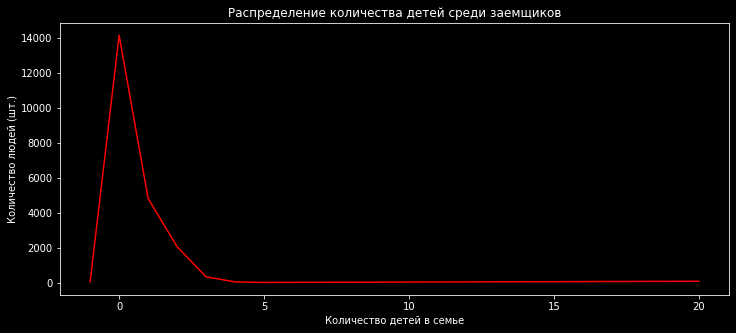

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.groupby('children')['children'].count(), 'r')
plt.title('Распределение количества детей среди заемщиков')
plt.xlabel('Количество детей в семье')
plt.ylabel('Количество людей (шт.)')
plt.show();

Продолжаем разбираться с переменными. Теперь посмотрим на возраст:

In [ ]:
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Кто эти люди, что в 1 год подают заявки на кредит? Посмотрим на них поближе!

In [ ]:
df[df['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.619,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522,автомобиль
149,0,-2664.273,0,среднее,1,в разводе,3,F,сотрудник,0,70176.436,операции с жильем
270,3,-1872.663,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.459,ремонт жилью
578,0,397856.565,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687,строительство собственной недвижимости
1040,0,-1158.030,0,высшее,0,в разводе,3,F,компаньон,0,303994.135,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,338734.869,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920,покупка своего жилья
20577,0,331741.271,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.763,недвижимость
21179,2,-108.967,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007,строительство жилой недвижимости


Среди них пенсионеры, люди в разводе и люди с высшим образованием. Вероятно нулями заполняли пустые значения. В этом кейсе пропущенные значения можно заполнить медианными значениями, однако, как мы заметили, среди наших "младенцев" есть как пенсионеры, так и люди помоложе, поэтому было бы неправильно всем им ставить одинаковый возраст. Лучше ***рассчитать средний возраст для каждой категории по перемеенной income_type (тип занятости) и подставлять пропущенные значения в соответствующие категории.*** А пока продолжаем изучать переменные. Посмотрим на гендер, на все 163!

In [ ]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [ ]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.601,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157,покупка недвижимости


А, нет, к сожалению, только 3. И третий здесь XNA, видимо текстовый аналог отсутствия/пропуска значения. Возможности вычислить, какой же гендер у человека с id 10701 нет, поэтому ***лучшим решением будет удалить пустую строку из переменной gender.***

In [ ]:
df.duplicated().sum()

54

В нашем датафрейме 54 дубликата. И это мы еще не привели к единообразию значения переменной education, возможно их станет больше. ***Все дубликаты из таблицы необходимо будет удалить.***

### Итоги знакомства с данными и промежуточные выводы

Подведем итоги ознакомления с данными. В нашем дата фрейме был обнаружен ряд проблем. Для их устранения были предложены меры их устранения. Соберем их в одном месте, чтобы ориентироваться на них как на список задач:
1. Отрицательные значения в переменной days_employed необходимо будет заменить на положительные;
2. По переменной days_employed небоходимо будет заменить тип данных на int64;
3. Значения переменной необходимо education сделать единообразными. Все символы должны быть привеены к единому регистру;
4. Пустые значения в переменных days_employed и total_income необходимо будет заменить на среднее или медиану;
5. Отрицательное значение переменной children (-1) необходимо заменить на положительные, а также заменим значение переменной children равное 20 на 2;
6. Расчитать средний возраст для каждой категории по перемеенной income_type (тип занятости) и подставлять пропущенные значения в соответствующие категории;
7. Удалить пустую строку из переменной gender (строку со значением XNA);
8. Все дубликаты из таблицы необходимо будет удалить.

## Предобработка данных <a id="some_id"></a>

### Обработка пропусков

Сначала уберем отрицательные значения переменной days_employed. Самый простой метод: умножить эти значения на -1. Для этого напишем функцию to_positive, которая и сделает это.

In [ ]:
def to_positive(row):
    value = row['days_employed']
    if value > 0:
            return value
    return value*-1

In [ ]:
df['days_employed'] = df['days_employed'].abs()

In [ ]:
df['days_employed'].describe()

count    19351.000
mean     66914.729
std     139030.881
min         24.142
25%        927.009
50%       2194.221
75%       5537.882
max     401755.400
Name: days_employed, dtype: float64

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639,покупка жилья
1,1,4024.804,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014,приобретение автомобиля
2,0,5623.423,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952,покупка жилья
3,3,4124.747,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550,дополнительное образование
4,0,340266.072,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078,сыграть свадьбу


Теперь самое низкое значение по переменной равно 24.141633. Посмотрим на среднюю и медиану, чтобы понять, чем будем заполнять пропуски.

In [ ]:
df['days_employed'].describe()

count    19351.000
mean     66914.729
std     139030.881
min         24.142
25%        927.009
50%       2194.221
75%       5537.882
max     401755.400
Name: days_employed, dtype: float64

In [ ]:
df['days_employed'].mean()

66914.72890682236

In [ ]:
df['days_employed'].median()

2194.220566878695

Значения очень сильно отличаются, причем медиана намного ниже, что свидетельствует о том, что у нас есть экстримально высокие значения. И да, метод describe() парой строк выше показал нам, максимальный по выборке трудовой стаж - 401755 дней. Это примерно 1100 лет. Во время службы в армии я встречал полковника, у которого срок службы в армии был почти равен или превышал его возраст. Так получалось из-за того, что он служил в нескольких горячих точках, и один год службы ему засчитывался за 3. Но в этом случае заслуги полковника уже не кажутся такими великими. ***Используем в качестве заполнителя пропущенных значений по переменной days_employed медиану.***

In [ ]:
days_employed_median = df['days_employed'].median()

In [ ]:
df['days_employed'].fillna(days_employed_median,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


C пропусками в переменной days_employed покончено. Настала очередь total_income! Проделываем аналогичные операции.

In [ ]:
df['total_income'].mean()

167422.30220817294

In [ ]:
df['total_income'].median()

145017.93753253992

In [ ]:
df['total_income'].max()

2265604.028722744

По переменной total_income нет сильных отличий между средним и медианой, но надежнее взять медиану, так как в выборке есть люди с ежемесячных доходов выше 2 млн, которые тянут среднее вверх.

In [ ]:
total_income_median = df['total_income'].median()

In [ ]:
df['total_income'].fillna(total_income_median,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


C пустыми значениями в столбце total_income тоже покончено. Теперь разберемся с переменной gender.

In [ ]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.601,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157,покупка недвижимости


In [ ]:
df.drop([10701, 0],inplace=True)

In [ ]:
df['gender'].value_counts()

F    14235
M     7288
Name: gender, dtype: int64

Теперь гендера снова 2. Дальше разберемся со странными значениями в переменной children.

In [ ]:
df['children'].value_counts()

 0     14148
 1      4817
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [ ]:
df.loc[df['children'] == -1, 'children'] = 1 

In [ ]:
df.loc[df['children'] == 20, 'children'] = 2 

In [ ]:
df['children'].value_counts()

0    14148
1     4864
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Никаких больше странных семей с отрицательным и аномально большим количеством детей! Теперь осталось разобраться только с людьми, которым 0 лет.

In [ ]:
df['income_type'][df['dob_years'] == 0].value_counts()

сотрудник      55
пенсионер      20
компаньон      20
госслужащий     6
Name: income_type, dtype: int64

In [ ]:
df['income_type'].value_counts()

сотрудник          11118
компаньон           5084
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [ ]:
mean_age_employee = df['dob_years'][df['income_type'] == 'сотрудник'].mean()
mean_age_companion = df['dob_years'][df['income_type'] == 'компаньон'].mean()
mean_age_pensioner = df['dob_years'][df['income_type'] == 'пенсионер'].mean()
mean_age_civil_servant = df['dob_years'][df['income_type'] == 'госслужащий'].mean()

print(mean_age_employee)
print(mean_age_companion)
print(mean_age_pensioner)
print(mean_age_civil_servant)

39.820831084727466
39.7006294256491
59.06301867219917
40.63673749143249


In [ ]:
def segment_age(row):
    age = row['dob_years']
    segment = row['income_type']
    if age == 0:
        if segment == 'сотрудник':
            return mean_age_employee
    if age == 0:
        if segment == 'компаньон':
            return mean_age_companion
    if age == 0:
        if segment == 'пенсионер':
            return mean_age_pensioner
    if age == 0:
        if segment == 'госслужащий':
            return mean_age_civil_servant    
    return age

In [ ]:
df['dob_years'] = df.apply(segment_age,axis=1)

In [ ]:
df['dob_years'].min()

19.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 1 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21523 non-null  int64  
 1   days_employed     21523 non-null  float64
 2   dob_years         21523 non-null  float64
 3   education         21523 non-null  object 
 4   education_id      21523 non-null  int64  
 5   family_status     21523 non-null  object 
 6   family_status_id  21523 non-null  int64  
 7   gender            21523 non-null  object 
 8   income_type       21523 non-null  object 
 9   debt              21523 non-null  int64  
 10  total_income      21523 non-null  float64
 11  purpose           21523 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


Ура, мы избавились от всех обнаруженных пропусков и аномалий! Правда в процессе всех преобразований у нас переменная dob_years изменила тип на float64. В этом случае, а также с переменной days_employed адекватнее использовать тип int64.

### Замена типа данных

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 1 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21523 non-null  int64  
 1   days_employed     21523 non-null  float64
 2   dob_years         21523 non-null  float64
 3   education         21523 non-null  object 
 4   education_id      21523 non-null  int64  
 5   family_status     21523 non-null  object 
 6   family_status_id  21523 non-null  int64  
 7   gender            21523 non-null  object 
 8   income_type       21523 non-null  object 
 9   debt              21523 non-null  int64  
 10  total_income      21523 non-null  float64
 11  purpose           21523 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 13.7 MB


In [ ]:
df['children'] = df['children'].astype('int8')
df['days_employed'] = df['days_employed'].astype('int32')
df['dob_years'] = df['dob_years'].astype('int8')
df['education_id'] = df['education_id'].astype('int8')
df['family_status_id'] = df['family_status_id'].astype('int8')
df['debt'] = df['debt'].astype('int8')
df['total_income'] = df['total_income'].astype('float32')

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 1 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21523 non-null  int8   
 1   days_employed     21523 non-null  int32  
 2   dob_years         21523 non-null  int8   
 3   education         21523 non-null  object 
 4   education_id      21523 non-null  int8   
 5   family_status     21523 non-null  object 
 6   family_status_id  21523 non-null  int8   
 7   gender            21523 non-null  object 
 8   income_type       21523 non-null  object 
 9   debt              21523 non-null  int8   
 10  total_income      21523 non-null  float32
 11  purpose           21523 non-null  object 
dtypes: float32(1), int32(1), int8(5), object(5)
memory usage: 12.8 MB


In [ ]:
df2 = df
df2['family_status'] = df['family_status'].astype('category')
df2['education'] = df['education'].astype('category')
df2['gender'] = df['gender'].astype('category')
df2['income_type'] = df['income_type'].astype('category')
df2 = df2.drop(['family_status_id', 'education_id'], axis=1)
df2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 1 to 21524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   children       21523 non-null  int8    
 1   days_employed  21523 non-null  int32   
 2   dob_years      21523 non-null  int8    
 3   education      21523 non-null  category
 4   family_status  21523 non-null  category
 5   gender         21523 non-null  category
 6   income_type    21523 non-null  category
 7   debt           21523 non-null  int8    
 8   total_income   21523 non-null  float32 
 9   purpose        21523 non-null  object  
dtypes: category(4), float32(1), int32(1), int8(3), object(1)
memory usage: 3.9 MB


Вещественные типы данных заменены на целочисленные для переменных days_employed и dob_years. В случае со столбцом total_income лучше оставить вещественный тип данных, так как "копейка рубль бережет", как говорил мой дедушка. Иначе говоря, значения после точки играют роль. Типы переменных также были оптимизированы для экономии объема используемой памяти.

### Обработка дубликатов

Сначала приведем в порядок значения переменной education, потому что с приведением ее в порядок количество дубликатов может быть увеличено.

In [ ]:
df.duplicated().sum()

54

In [ ]:
df['education'].value_counts()

среднее                13750
высшее                  4717
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      667
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [ ]:
df['education'] = df['education'].str.lower()

In [ ]:
df['education'].value_counts()

среднее                15233
высшее                  5259
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

In [ ]:
df.duplicated().sum()

71

Как и предсказывали, хоть и немного, но количество дубликатов увеличилось. Теперь, когда они все в сборе, удалим их!

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21452 non-null  int8    
 1   days_employed     21452 non-null  int32   
 2   dob_years         21452 non-null  int8    
 3   education         21452 non-null  object  
 4   education_id      21452 non-null  int8    
 5   family_status     21452 non-null  category
 6   family_status_id  21452 non-null  int8    
 7   gender            21452 non-null  category
 8   income_type       21452 non-null  category
 9   debt              21452 non-null  int8    
 10  total_income      21452 non-null  float32 
 11  purpose           21452 non-null  object  
dtypes: category(3), float32(1), int32(1), int8(5), object(2)
memory usage: 671.2+ KB


Теперь в нашем датафрейме ни пропусков, ни повторов! Он сам правда стал меньше, но вроде не критично, зато данные чище.

### Лемматизация

Для начала найдем самые частовстречающиеся леммы.

In [ ]:
list_of_lemmas = df['purpose']
lemmas = []
for i in list_of_lemmas:
    lemma = ''.join(m.lemmatize(i))
    lemmas.append(lemma)

In [ ]:
total_list_of_lemma = ''.join(lemmas).replace('\n',' ')
lemmas_lemmas = m.lemmatize(total_list_of_lemma)
print(Counter(lemmas_lemmas))

Counter({' ': 55019, 'недвижимость': 6350, 'покупка': 5895, 'жилье': 4459, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2324, 'свой': 2230, 'на': 2222, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'проведение': 768, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'подержанный': 486, 'подержать': 478, 'приобретение': 461, 'профильный': 436, ' \n': 1})


Самые часто встречающиеся леммы: жилье и недвижимость (это, думаю, можно считать одиним и тем же), автомобиль, образование, свадьба). Все, что к этому не подойдет (вдруг!), можно относить к категории "другое".

In [ ]:
def to_lemma(row):
    value = row['purpose']
    lemmas = m.lemmatize(value)
    return lemmas

In [ ]:
df['purpose'] = df.apply(to_lemma,axis=1)

In [ ]:
def to_new_category(row):
    reason = row['purpose']
    if 'автомобиль' in reason:    
            return 'автомобиль'
    if 'недвижимость' in reason:
            return 'недвижимость'
    if 'жилье' in reason:
            return 'недвижимость'    
    if 'образование' in reason:    
            return 'образование'
    if 'свадьба' in reason:    
            return 'свадьба'
    return 'другое'

In [ ]:
df['purpose'] = df.apply(to_new_category,axis=1)

In [ ]:
df['purpose'].value_counts()

недвижимость    10809
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose, dtype: int64

Отлично, получается, что большинство людей в выборке подают заявку на кредит на покупку жилья. С одинаковой частотой люди подают заявки на кредит на покупку автомобиля и на получение образования. И наименее популярные кредиты - на проведение свадьбы. 

### Категоризация данных

В категоризации в нашем датасете нуждаются 2 переменные: days_employed и total_income. Но как определить, на какие интервалы разбить. Предлагаю по процентилям.

In [ ]:
pd.qcut(df['days_employed'],5).value_counts()

(2611.6, 7043.0]      4293
(818.2, 1805.0]       4292
(23.999, 818.2]       4291
(1805.0, 2611.6]      4288
(7043.0, 401755.0]    4288
Name: days_employed, dtype: int64

In [ ]:
def work_experience_group(days):
        if days < 818.2:
                return 'короткий стаж работы'
        if days < 1805.0:
                return 'стаж работы ниже среднего'
        if days < 2611.6:
                return 'средний стаж работы'
        if days < 7043.0:
                return 'стаж работы выше среднего'    
        return 'высокий стаж работы'

In [ ]:
df['work_experience_group'] = df['days_employed'].apply(work_experience_group)

In [ ]:
df['work_experience_group'].value_counts()

высокий стаж работы          4292
средний стаж работы          4292
короткий стаж работы         4291
стаж работы выше среднего    4289
стаж работы ниже среднего    4288
Name: work_experience_group, dtype: int64

Со стажем работы готово. Теперь перейдем к месячному доходу.

In [ ]:
pd.qcut(df['total_income'],5).value_counts()

(20667.263, 98536.016]      4291
(214598.912, 2265604.0]     4291
(98536.016, 135445.559]     4290
(135445.559, 156421.672]    4290
(156421.672, 214598.912]    4290
Name: total_income, dtype: int64

In [ ]:
def income_group(days):
        if days < 98536.017:
                return 'низкий доход'
        if days < 135445.558:
                return 'доход ниже среднего'
        if days < 156421.67:
                return 'средний доход'
        if days < 214598.918:
                return 'доход выше среднего'    
        return 'высокий доход'

In [ ]:
df['income_group'] = df['total_income'].apply(income_group)

In [ ]:
df['income_group'].value_counts()

низкий доход           4291
высокий доход          4291
доход ниже среднего    4290
доход выше среднего    4290
средний доход          4290
Name: income_group, dtype: int64

In [ ]:
df['work_experience_group'].value_counts()

высокий стаж работы          4292
средний стаж работы          4292
короткий стаж работы         4291
стаж работы выше среднего    4289
стаж работы ниже среднего    4288
Name: work_experience_group, dtype: int64

In [ ]:
def children_group(days):
        if days == 0:
                return 'нет детей'    
        return 'есть дети'

In [ ]:
df['children_group'] = df['children'].apply(children_group)

In [ ]:
df['children_group'].value_counts()

нет детей    14090
есть дети     7362
Name: children_group, dtype: int64

In [ ]:
df['debt'].value_counts()

0    19711
1     1741
Name: debt, dtype: int64

На основании количественных переменных days_employed, total_income и children были получены категориальные переменные work_experience_group, income_group и children_group. Теперь будет удобнее смотреть взаимосвязь между трудовым стажем (хотя вот сейчас понял, что это особо не понадобится), доходом, наличием детей и другими переменными!

## Поиск взаимосвязей между наличием кредитного долга и другими показателями

### Зависимость между наличием детей и возвратом кредита в срок

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [ ]:
df.groupby('children_group')['debt'].agg(['count','sum','mean'])

,count,sum,mean
children_group,,,
есть дети,7362,678.000,0.092
нет детей,14090,1063.000,0.075


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contigency_pct = pd.crosstab(df['children_group'], df['debt'], normalize='index')
contigency_pct

debt,0,1
children_group,,
есть дети,0.908,0.092
нет детей,0.925,0.075


In [ ]:
contigency= pd.crosstab(df['debt'], df['children_group'])
contigency

children_group,есть дети,нет детей
debt,,
0,6684,13027
1,678,1063


**H0** = *Нулевая гипотеза заключается в том, что частоты согласованы, то есть фактические данные не противоречат ожидаемым*

**H1** = *Альтернативная гипотеза – отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы*

In [ ]:
c, p_value, dof, expected = chi2_contingency(contigency)
alpha = 0.05

print('p-значение:', "%.5f" % p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, расхождения статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00003
Отвергаем нулевую гипотезу, расхождения статистически значимы


**Наблюдаемая закономерность:**

Люди при отсутствии детей чаще возвращают кредит в срок.

### Зависимость между семейным положением и возвратом кредита в срок

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
df.groupby('family_status')['debt'].agg(['count','sum','mean'])

,count,sum,mean
family_status,,,
Не женат / не замужем,2810,274.000,0.098
в разводе,1195,85.000,0.071
вдовец / вдова,959,63.000,0.066
гражданский брак,4150,388.000,0.093
женат / замужем,12338,931.000,0.075


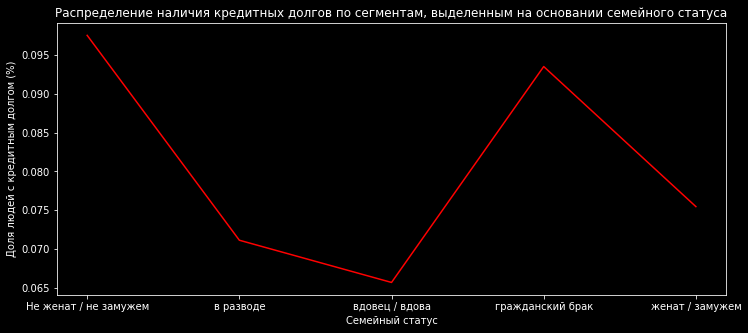

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.groupby('family_status')['debt'].mean(), 'r')
plt.title('Распределение наличия кредитных долгов по сегментам, выделенным на основании семейного статуса')
plt.xlabel('Семейный статус')
plt.ylabel('Доля людей с кредитным долгом (%)')
plt.show();

**Наблюдаемая тенденция:**
Наиболее склонны закрывать кредиты в срок вдовы/вдовцы, разведенные и женатые/замужние. Не женатые и живующие в гражданском браке, напротив, чаще имеют задолженности по кредиту.

### Зависимость между семейным положением и возвратом кредита в срок

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
df.groupby('income_group')['debt'].agg(['count','sum','mean'])

,count,sum,mean
income_group,,,
высокий доход,4291,300.000,0.070
доход выше среднего,4290,370.000,0.086
доход ниже среднего,4290,355.000,0.083
низкий доход,4291,344.000,0.080
средний доход,4290,372.000,0.087


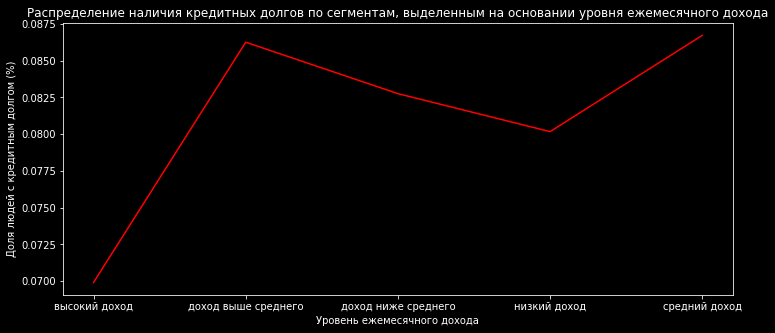

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.groupby('income_group')['debt'].mean(), 'r')
plt.title('Распределение наличия кредитных долгов по сегментам, выделенным на основании уровня ежемесячного дохода')
plt.xlabel('Уровень ежемесячного дохода')
plt.ylabel('Доля людей с кредитным долгом (%)')
plt.show();

**Наблюдаемая тенденция:**

Предсказуемый резульатат - люди с наибольшим доходом реже остальных имеют долги по кредиту.

### Зависимость между целями кредита и возвратом кредита в срок

- Как разные цели кредита влияют на его возврат в срок?

In [ ]:
df.groupby('purpose')['debt'].agg(['count','sum','mean'])

,count,sum,mean
purpose,,,
автомобиль,4306,403.000,0.094
недвижимость,10809,782.000,0.072
образование,4013,370.000,0.092
свадьба,2324,186.000,0.080


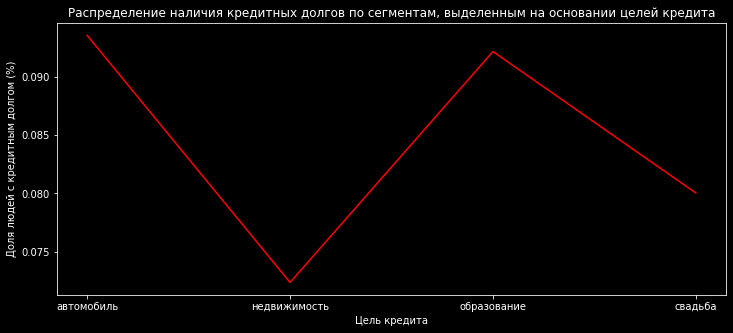

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.groupby('purpose')['debt'].mean(), 'r')
plt.title('Распределение наличия кредитных долгов по сегментам, выделенным на основании целей кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Доля людей с кредитным долгом (%)')
plt.show();

**Наблюдаемая тенденция:**

Люди, целью получения кредита которых является недвижимость или свадьба, чаще возвращают кредит в срок.

## Общий вывод

**На возвращение кредита в срок влияет множество показателей:**

**На возвращение кредита в срок влияет множество показателей:**
1. Семьи, где отсутствуют дети, чаще возвращают кредит в срок: доля должников среди заемщиков с детьми составляет 0.092095, для заемщиков без детей - 0.075444;
2. Вдовы/вдовцы (в скобках здесь и далее указана доля должников - 0.065693), разведенные (0.071130) и женатые/замужние (0.075458) более склонны закрывать кредиты в срок, чем не женатые (0.097509) и живующие в гражданском браке(0.093494);
3. Люди с наибольшим ежемесячным доходом реже остальных имеют долги по кредиту (0.069914). В остальных группах доля должников находится примерно на одном уровне: доход выше среднего - 0.086247, средний доход - 0.086713, доход ниже среднего - 0.082751, низкий доход - 0.080168;
4. Люди, целью получения кредита которых является недвижимость (0.072347) или свадьба (0.080034), чаще возвращают кредит в срок чем те, кто оставляет заявку с целью приобретения автомобиля (0.093590) или получения образования (0.092200).

**Идеальный для банка заемщик обладает следующим набором характеристик:**
Дети: отсутствуют;
Семейный статус (одно из): вдовы/вдовцы, разведенный(ая), женатый/замужний;
Ежемесячный доход: высокий (примерно от 214598.918);
Цель кредита (одно из): недвижимость, свадьба

***Для максимизации возврата кредитных инвестиций банку при рассмотрений заявок на кредит рекомендуется ориентироваться приемущественно на заемщиков, соответствующих описанным выше характеристикам.***